## Lab Exercise_4 - PANDAS - DATA ANALYSIS

### About the dataset (Customer Tip Data)

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

Attribute Information:

**total_bill:** Total bill (cost of the meal), including tax, in US dollars

**tip:** Tip in US dollars

**sex:** Sex of person paying for the meal

**smoker:** There is a smoker in a group or not

**day:** Day on which the order is served

**time:** Time of the order

**size:** Size of the group

**Import the required libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#### Load the customer tip dataset and print the first five observations

In [6]:
cust_tip_df=pd.read_csv('C:\\Users\\SANKAR\\Desktop\\lab 3,4\\Lab_Exercise 4\\Lab_Exercise 4\\customer_tip.csv')
cust_tip_df.head(5)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Let's begin with some hands-on practice exercises

### 1. Print the column names of categorical and numerical variables in the data


In [7]:
cat_cols=[col for col in cust_tip_df.columns if cust_tip_df[col].dtype=="O"]
num_cols=[col for col in cust_tip_df.columns if cust_tip_df[col].dtype=="O"]
print("the categorical columns are {}".format(cat_cols))
print("the numerical columns are {}".format(num_cols))

the categorical columns are ['sex', 'smoker', 'day', 'time']
the numerical columns are ['sex', 'smoker', 'day', 'time']


### 2. Print the average value of Total bill amount and tips

In [8]:
col_lst=["total_bill","tip"]
cust_tip_df[col_lst].mean().to_frame(name="Average")


,Average
total_bill,19.785943
tip,2.998279


### 3. Compute the average bill amount for each day


In [9]:
cust_tip_df.groupby("day").agg(Total_Bill_Avg=("total_bill","mean"))

,Total_Bill_Avg
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


### 4. Which gender is more generous in giving the tip?</b>


In [35]:
summary_df=cust_tip_df.groupby("sex").agg(Tip_Median=("tip","median"))
female_median_tip=summary_df.loc["Female","Tip_Median"]
male_median_tip=summary_df.loc["Male","Tip_Median"]

if female_median_tip>male_median_tip:
    print("the median tip of female is %0.2f which is higher than the median tip of male %0.2f.\nHence female are more generous in giving the tip"%(female_median_tip,male_median_tip))
elif female_median_tip<male_median_tip:
     print("the median tip of male is %0.2f which is higher than the median tip of female %0.2f.\nHence male are more generous in giving the tip"%(male_median_tip,female_median_tip))
else:
    print("both male and female median tip value is %0.2f and are same.\nHence both are equally generous in giving tips.")

the median tip of male is 3.00 which is higher than the median tip of female 2.75.
Hence male are more generous in giving the tip


### 5. According to the data, were there more customers for dinner or lunch? </b>


In [12]:
noofcust_df=cust_tip_df.groupby("time").agg(NoOfCustomers=("size","sum"))
dinner_noofcust=noofcust_df.loc["Dinner","NoOfCustomers"]
lunch_noofcust=noofcust_df.loc["Lunch","NoOfCustomers"]

if dinner_noofcust>lunch_noofcust:
    print("the no of customers for dinner is %d which is more than no of cust for lunch %d." %(dinner_noofcust,lunch_noofcust))
elif lunch_noofcust>dinner_noofcust:
     print("the no of customers for lunch is %d which is more than no of cust for dinner %d." %(lunch_noofcust,dinner_noofcust))
else:
    print("Both male and female median tip value is %0.2f and are same.\nHence both are equally generous in giving tips.")

the no of customers for dinner is 463 which is more than no of cust for lunch 164.


### 6. comment on the variable 'tip' based on its measure of dispersion 

In [ ]:
cust_tip_df["tip"].plot(kind="kde")
plt.xlim(0)
plt.show()


### 7. Plot the distribution of bill amount and tip and comment about its normality

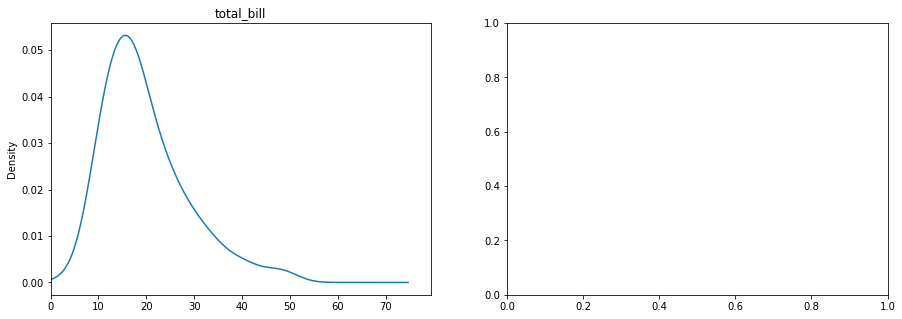

In [13]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
for i,col in enumerate(["total_bill","tip"]):
    cust_tip_df[col].plot(kind="kde",ax=axes[i])
    axes[i].title.set_text(col)
    axes[i].set_xlim(0)
    plt.show()


### 8. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot


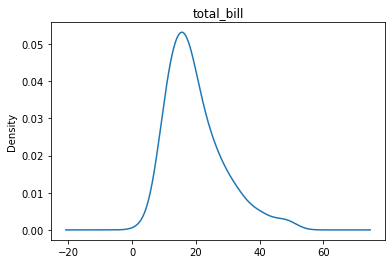

In [14]:
cust_tip_df["total_bill"].plot(kind="kde")
plt.title("total_bill")
plt.show()


### 9. Analyze the realation between bill_amount and tips

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

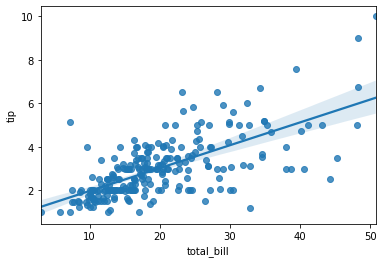

In [15]:
sns.regplot(x="total_bill",y="tip",data=cust_tip_df)

### 10. Find the covaraiance and correlation between bill_amount and tips. Infer the results

In [17]:
covar=np.cov(cust_tip_df["tip"],cust_tip_df["total_bill"])[0,1]
print("the covariance of total bill amount and tips is %.2f"% covar)

the covariance of total bill amount and tips is 8.32


### 11. Analyze the realtion between bill_amount, tips and sex

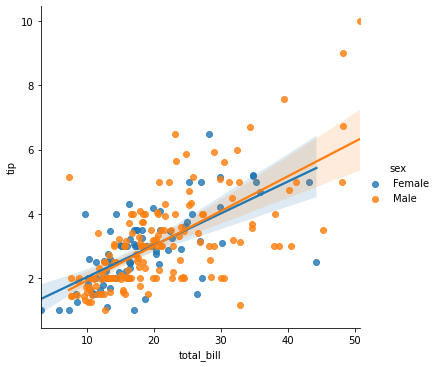

In [18]:
sns.lmplot(x="total_bill",y="tip",hue="sex",data=cust_tip_df)
plt.show()


### 12. Find the average number of customer for dinner and Lunch for each day 

In [24]:
cust_tip_df.pivot_table(index="day",columns="time",values="size",aggfunc=np.sum).mean().round().to_frame(name="Avg_NoofCustomers")

,Avg_NoofCustomers
time,
Dinner,116.0
Lunch,82.0


### 13. Find the average bill-amount  for dinner and Lunch for each day

In [25]:
cust_tip_df.pivot_table(index="day",columns="time",values="size",aggfunc=np.sum).mean().round().to_frame(name="Average_Bill_Amount")

,Average_Bill_Amount
time,
Dinner,116.0
Lunch,82.0


### 14. Comment about the tips given by the smokers

<AxesSubplot:xlabel='smoker', ylabel='tip'>

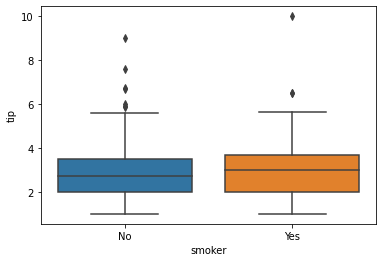

In [21]:
sns.boxplot(x="smoker",y="tip",data=cust_tip_df)


### 15.Create a Pivot table with sex and smokers with their average tip amount

In [22]:
cust_tip_df.pivot_table(index="sex",columns="smoker",values="tip",aggfunc=np.mean).round(2)

smoker,No,Yes
sex,,
Female,2.77,2.93
Male,3.11,3.05


### 16. Compute the tips per person for each observation (tips/size)

In [23]:
cust_tip_df["tip_per_person"]=cust_tip_df["tip"]/cust_tip_df["size"]
cust_tip_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500
